In [1]:
from utils.utils import *
import networkx as nx
import matplotlib.pyplot as plt
from netgraph import Graph

In [33]:
datasets = ['karate','dolphins','football','polbooks']

In [34]:
def generate_dataset_image(  dataset ):
    file_path = f'./data/reel/{dataset}/{dataset}.gml'
    G = nx.read_gml(file_path, label='id')

    mapping = {node: i+1 for i, node in enumerate(sorted(G.nodes()))}
    G = nx.relabel_nodes(G, mapping)

    true_labels = read_community_labels_file_reel(
        f'./data/reel/{dataset}/groundTruth.txt')




    partion = {node+1: comm for node,comm in true_labels}



    node_labels = {node: f"{node}" for node, comm in partion.items()}



    community_to_color = {
                            0: 'tab:blue',
                            1: 'tab:red',
                            2: 'tab:orange',
                            3: 'tab:green',
                            4: 'tab:pink',
                            5: "#33A6FF",
                            6: "#FFD133",
                            7: "#33FFD1",
                            8: "#D133FF",
                            9: "#FFE133",
                            10: "#33FFE1",
                            11: 'tab:blue',
                            12: '#33A6FF',
                        }



    node_color = {node: community_to_color[community_id] for node, community_id in partion.items()}
    plt.figure(figsize=(15, 15))
    Graph(
        G,
        node_color=node_color, node_edge_width=0.3, edge_alpha=.5, edge_width=.5,
        node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
        edge_layout='bundled', edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=4, scale=(1.6, 1.6)



    )
    plt.show()

c:\Users\ASUS ROG\anaconda3\Lib\site-packages\netgraph\_node_layout.py:1024: RuntimeWarning: invalid value encountered in divide
  directions = deltas / magnitudes[:, np.newaxis]


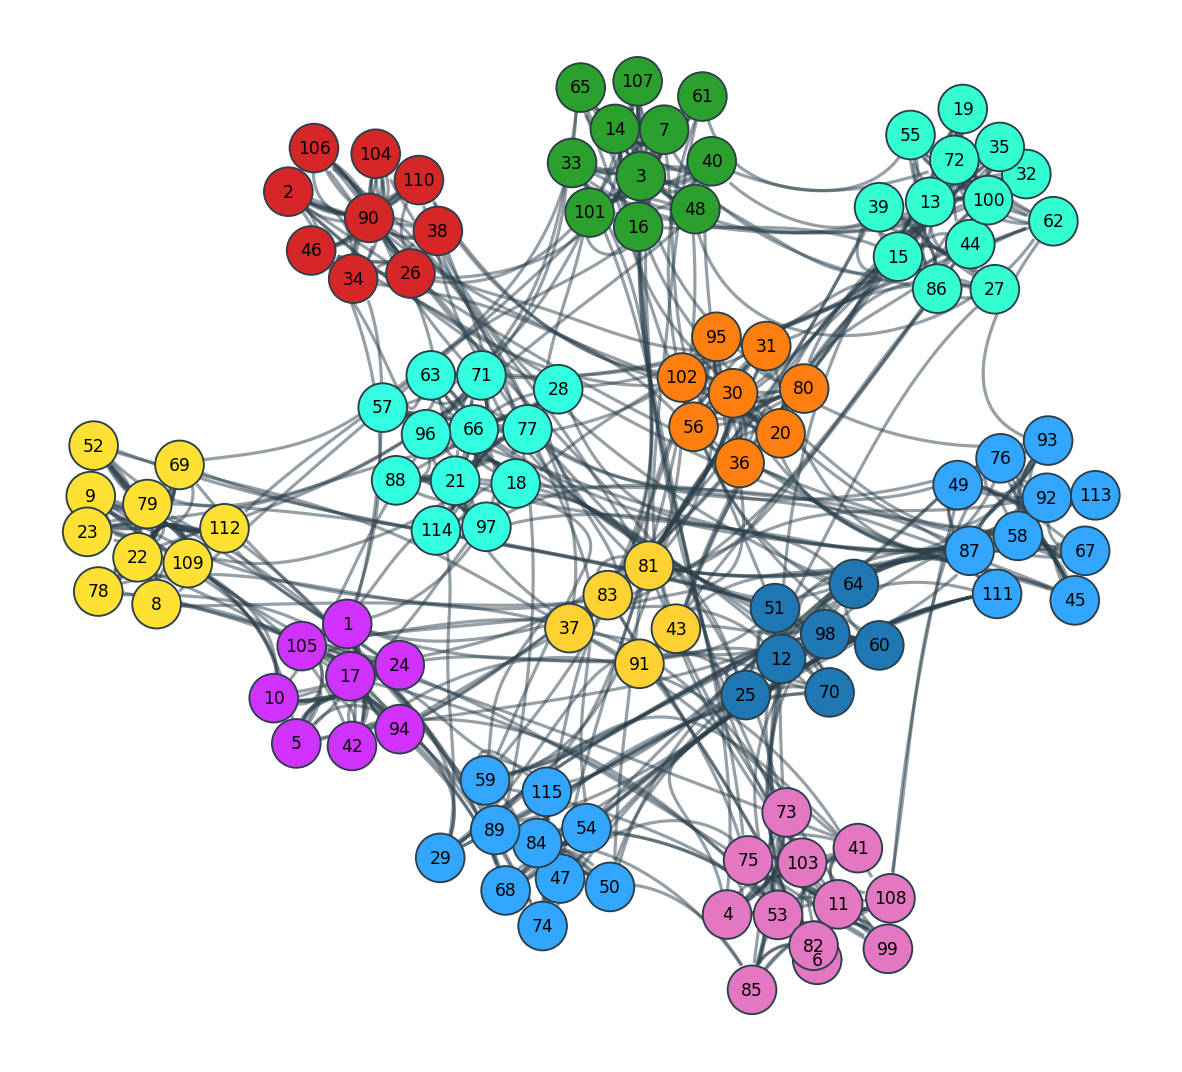

In [35]:

generate_dataset_image('football')    


{1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: '10',
 11: '11',
 12: '12',
 13: '13',
 14: '14',
 15: '15',
 16: '16',
 17: '17',
 18: '18',
 19: '19',
 20: '20',
 21: '21',
 22: '22',
 23: '23',
 24: '24',
 25: '25',
 26: '26',
 27: '27',
 28: '28',
 29: '29',
 30: '30',
 31: '31',
 32: '32',
 33: '33',
 34: '34'}

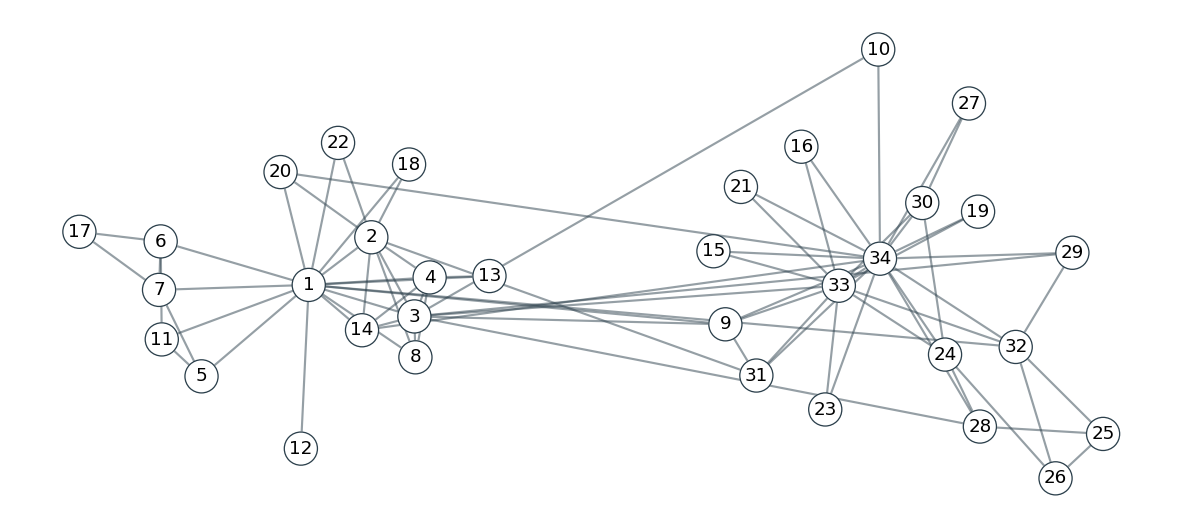

In [51]:
dataset = 'karate'
file_path = f'./data/reel/{dataset}/{dataset}.gml'
G = nx.read_gml(file_path, label='id')

mapping = {node: i+1 for i, node in enumerate(sorted(G.nodes()))}
G = nx.relabel_nodes(G, mapping)

true_labels = read_community_labels_file_reel(
    f'./data/reel/{dataset}/groundTruth.txt')

partion = {node+1: comm for node, comm in true_labels}

node_labels = {node: f"{node}" for node, comm in partion.items()}

community_to_color = {
    0: 'tab:blue',
    1: 'tab:red',
    2: 'tab:blue',
    3: '#FFFF00',
    4: 'tab:pink',
    5: "#33A6FF",
    6: "#FFD133",
    7: "#33FFD1",
    8: "#D133FF",
    9: "#FFE133",
    10: "#33FFE1",
    11: 'tab:blue',
    12: '#33A6FF',
}

node_color = {node: community_to_color[community_id]
                for node, community_id in partion.items()}


node_color = {node: '#fff'
              for node, community_id in partion.items()}
plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=0.3, edge_alpha=.5, edge_width=.5,
    node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
     edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=4, scale=(1.6, 1.6)



)
plt.show()

In [49]:
node_color[24] = '#FFFF00'

for neighbor in list(G.neighbors(24)) : 
    node_color[neighbor] = 'tab:green'

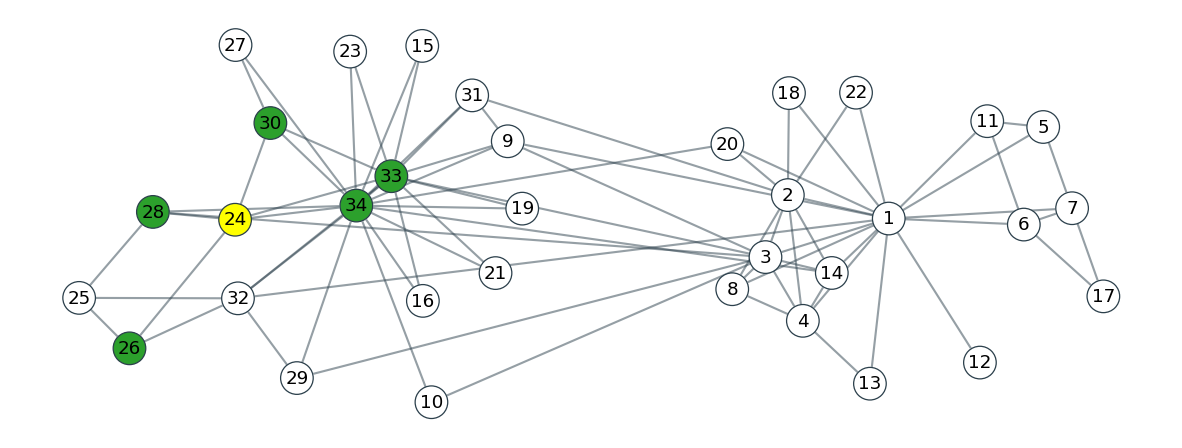

In [50]:
plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=0.3, edge_alpha=.5, edge_width=.5,
    node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
    edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=4, scale=(1.6, 1.6)



)
plt.show()

In [52]:
node_color[1] = '#FFFF00'

for neighbor in [5,6,7,17]:
    node_color[neighbor] = 'tab:green'

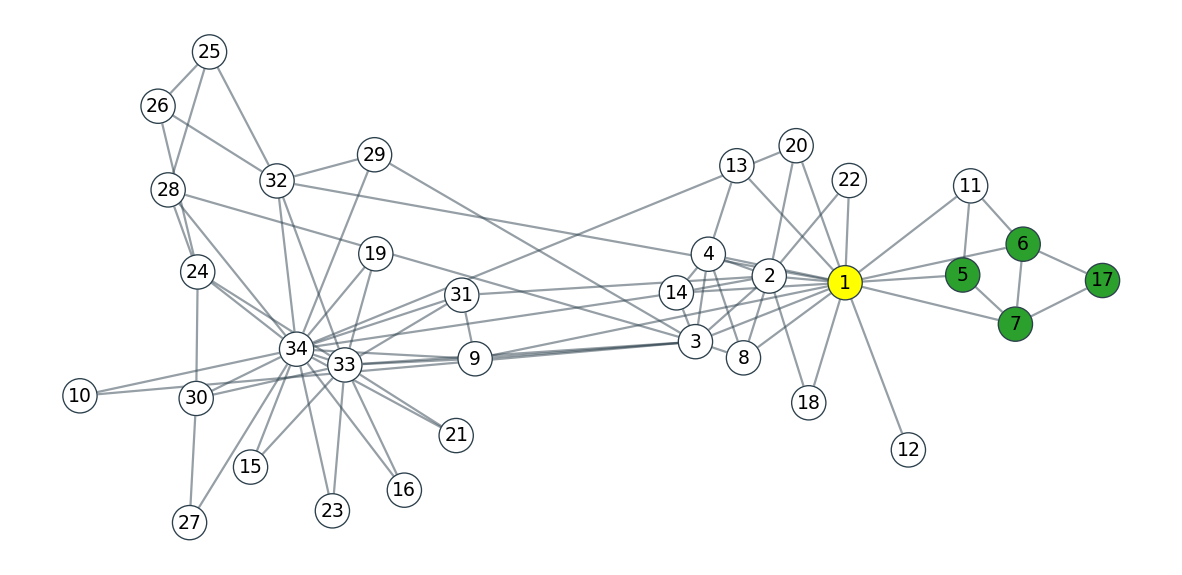

In [53]:
plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=0.3, edge_alpha=.5, edge_width=.5,
    node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
    edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=4, scale=(1.6, 1.6)



)
plt.show()